In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**4 Задание**

In [ ]:
df = pd.read_excel("/content/data_matstat_K5.xlsx", sheet_name = "D - homedat")['D3'].to_numpy()

In [ ]:
print("Длина: ", len(df))
print("Среднее: ", np.mean(df))
print("Дисперсия:", np.var(df))
print("с.к.о: ", np.std(df))


Длина:  117
Среднее:  1260.4444444444443
Дисперсия: 149682.5033238367
с.к.о:  386.88823104849894


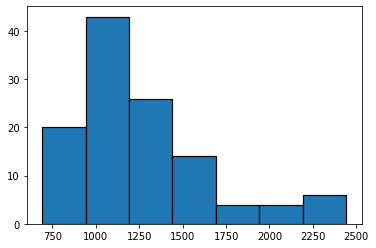

In [ ]:
k = 7
frequencies = (plt.hist(df, bins = k, edgecolor = "black", linewidth = 1.2))[0]

[0.17094017094017094, 0.36752136752136755, 0.2222222222222222, 0.11965811965811966, 0.03418803418803419, 0.03418803418803419, 0.05128205128205128]


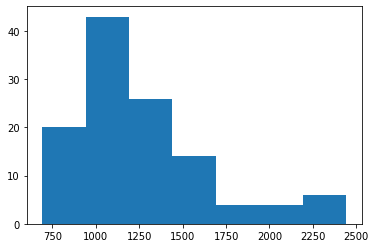

In [ ]:
n = len(df)
relative_frec = list()
for i in frequencies:
  relative_frec.append(i/n)
values = plt.hist(df, bins = k)[1]
print(relative_frec)

In [ ]:
mean = np.mean(df)
std = np.std(df)
p = list()
count,division = np.histogram(df, bins=k)
for i in range(1, len(division)):
  p.append(stats.norm(loc = mean, scale = std).cdf(division[i]) - stats.norm(loc = mean, scale = std).cdf(division[i-1]))
print(p)

[0.13389384508554236, 0.22455454016675014, 0.2512724840108399, 0.18761144741799007, 0.0934520828188603, 0.031042616979024995, 0.0068723554371324935]


[ 690.          940.42857143 1190.85714286 1441.28571429 1691.71428571
 1942.14285714 2192.57142857 2443.        ]


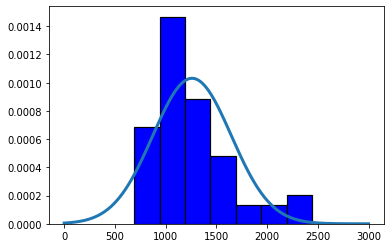

In [ ]:
#Построить гистограмму относительных частот и функцию плотности

x = np.linspace(0, 3000, 10000)
norm_rv = stats.norm(loc = mean, scale = std)
pdf = norm_rv.pdf(x)
plt.show()
# плотность 
plt.plot(x, pdf, lw=3)
b = plt.hist(df, bins=k, density=True, color = "blue", edgecolor = 'black', linewidth = 1.2)[1]
print(b)


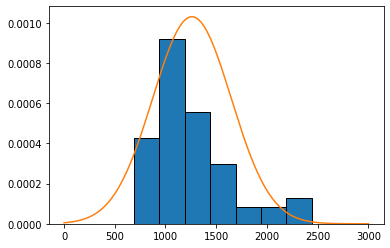

In [ ]:
data = df
fig = plt.figure()
ax = fig.add_subplot (111)
ax.hist (data, edgecolor='black', bins = 7, weights=np.ones_like (data) / (len (data) * 400)) 
plt.plot (x, stats.norm. pdf (x, mean, std))

In [ ]:
#Критерий Пирсона:
z = 0
for i in range(len(frequencies)):
  z += ((n * p[i] - frequencies[i])**2)/(n * p[i])
print(z)
r = 2
f_z_chi = stats.chi2(k - r - 1).cdf(z)
p_value =  1 - f_z_chi
print(p_value)

53.1326111210918
7.994271911115902e-11


In [ ]:
stats.jarque_bera(df)

Jarque_beraResult(statistic=46.639277329367246, pvalue=7.454348249780196e-11)

### **5 задание**

In [ ]:
X = pd.read_excel("/content/data_matstat_K5.xlsx", sheet_name = "D - homedat")['D2'].to_numpy()
Y = pd.read_excel("/content/data_matstat_K5.xlsx", sheet_name = "D - homedat")['D3'].to_numpy()

In [ ]:
n1 = len(X)
n2 = len(Y)
print(n1, n2)

117 117


In [ ]:
ans = stats.wilcoxon(X, Y)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))


In [ ]:
#критерий знаков
k = 0
for i in range(117):
  if (Y[i] - X[i] > 0):
    k += 1
k = k /n1
z1 = 2 * (n1 ** 0.5)*( k - 0.5)
print(z1)
u = stats.norm(loc = 0, scale = 1).cdf(z1)
p_value = 2 * min(u, 1 - u)
print(p_value)

8.228052910674233
2.220446049250313e-16


[15. 46. 31.  9.  5.  5.  6.]


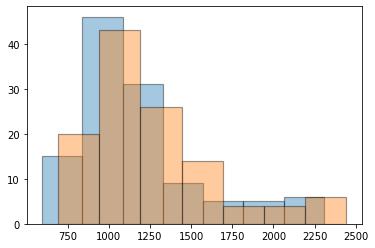

In [ ]:
frequencies_X = plt.hist(X, bins = 7, edgecolor = "black", linewidth = 1.2, alpha = 0.4)[0]
frequencies_Y = plt.hist(Y, bins = 7, edgecolor = "black", linewidth = 1.2, alpha = 0.4)[0]

In [ ]:
rel_X = list() 
rel_Y = list() 
nX = len(X)
nY = len(Y)
z2 = 0
k = 7
for i in  range(len(frequencies_X)):
  rel_X.append(frequencies_X[i]/len(X))
  rel_Y.append(frequencies_Y[i]/len(Y))
for i in range(7):
  z2 += nX * nY / (frequencies_X[i] + frequencies_Y[i]) * ((rel_X[i] - rel_Y[i])**2)
print(z2)
p_value = 1 - stats.chi2(k - 2 - 1).cdf(z2)
print(p_value)

2.5631845449807553
0.6333584735908363


array([0.00068259, 0.00146757, 0.00088737, 0.00047781, 0.00013652,
       0.00013652, 0.00020478])

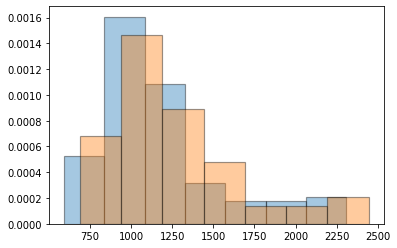

In [ ]:
plt.hist(X, bins = 7, edgecolor = "black", linewidth = 1.2, alpha = 0.4, density = True)[0]
plt.hist(Y, bins = 7, edgecolor = "black", linewidth = 1.2, alpha = 0.4, density = True)[0]

[15. 46. 31.  9.  5.  5.  6.]
[20. 43. 26. 14.  4.  4.  6.]


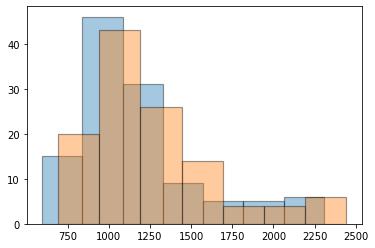

In [ ]:
a = plt.hist(X, bins = 7, edgecolor = "black", linewidth = 1.2, alpha = 0.4)[0]
b = plt.hist(Y, bins = 7, edgecolor = "black", linewidth = 1.2, alpha = 0.4)[0]
print(a)
print(b)

In [ ]:
data = X
fig = plt.figure()
ax = fig.add_subplot (111)
ax.hist (data, edgecolor='black', bins = 7, weights=np.ones_like (data) / len (data), alpha = 0.3) 
data1 = Y
fig1 = plt.figure()
ax = fig1.add_subplot (111)
ax.hist (data1, edgecolor='black', bins = 7, weights=np.ones_like (data1) / len (data1), color = "red", alpha = 0.3) 

(array([0.12820513, 0.39316239, 0.26495726, 0.07692308, 0.04273504,
        0.04273504, 0.05128205]),
 array([ 594.        ,  838.71428571, 1083.42857143, 1328.14285714,
        1572.85714286, 1817.57142857, 2062.28571429, 2307.        ]),
 <a list of 7 Patch objects>)

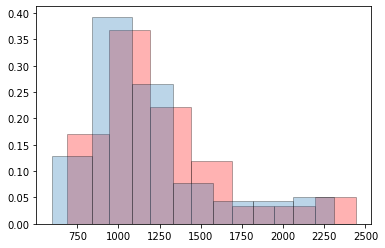

In [ ]:
plt.hist(data1, edgecolor='black', bins = 7, weights=np.ones_like (data1) / len (data1), color = "red", alpha = 0.3)
plt.hist(data, edgecolor='black', bins = 7, weights=np.ones_like (data) / len (data), alpha = 0.3)



## Задание №6 Таблица сопряжённости

In [ ]:
df1 = pd.read_excel("/content/data_matstat_K5.xlsx", sheet_name = "D - homedat")['D8'].to_numpy()
df2 = pd.read_excel("/content/data_matstat_K5.xlsx", sheet_name = "D - homedat")['D12'].to_numpy()

In [ ]:
print(df1)
print(df2)

['Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N']


In [ ]:
kN1 = 0
kY1 = 0
kN2 = 0
kY2 = 0
for i in df1:
  if  (i == 'N'):
      kN1+=1
  else:
    kY1+=1
for i in df2:
  if  (i == 'N'):
    kN2+=1
  else:
    kY2+=1
print(kN1, kY1, kN2, kY2)

90 27 79 38


In [ ]:
k1 = 90 * 79 /117
print(k1)

60.76923076923077


In [ ]:
k2 = 90*38 / 117
print(k2)

29.23076923076923


In [ ]:
k3 = 79* 27 / 117
print(k3)

18.23076923076923


In [ ]:
k4 = 27*38 / 117
print(k4)

8.76923076923077


In [ ]:
z = ((67 - k1)**2)/k1+ ((23 - k2)**2)/k2 + ((12 - k3)**2)/k3 + ((15 - k4)**2)/k4
print(z) 

8.523617588274483


In [ ]:
p_value = 1 - stats.chi2(1).cdf(z)

In [ ]:
print(p_value)

0.0035056693810920914
